In [5]:
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [29]:
#our dataset is builtin training model of some sort

fashionds = keras.datasets.fashion_mnist  #downloads file -- needs internet
(training_imgs, training_lbls), (testing_imgs, testing_lbls) = fashionds.load_data() #splits dataset into training and testing tuples
print(training_imgs.shape)
print(testing_imgs.shape)

4422102/4422102 [==============================] - 5s 1us/step
(60000, 28, 28)
(10000, 28, 28)


so we happen to have 60,000 images that have 28 by 28  pixels. i.e. 60,000 images with 784 pixels in total

In [30]:
training_imgs[0,23,23] #remember pixels are vals btn 0-255; this line should show you representation of one pixel

194

In [31]:
training_imgs[10] #remember pixels are vals btn 0-255; this line should show you representation of one pixel

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

In [32]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankleboot']

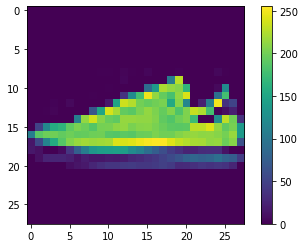

In [34]:
#to show you what the images look like
plt.figure()
plt.imshow(training_imgs[6])
plt.colorbar()
plt.grid(False)
plt.show()

### Data Preprocessing
we preprocess our data, by transforming it and then feedidng it to the model. in this stage we basically scale our (0-255) pixel vals to vals btn 0 and 1. this is done by dividing each val in the training and testing sets by 255. This is done cos vals btn 0 and 1 are relatively compressed as compared to that of the 0-255 and all decimal points btn. so it easier to process by the model.

In [35]:
training_imgs = training_imgs/255.0
testing_imgs = testing_imgs/255.0 #so that we dont get vals truncated to int datatype

### Building the Model
We will use keras sequential model with three different layers. this model uses a feed forward Neural Network - passing vals from left to right....i.e. going through the model sequentially.
Each layer is broken down with its architecture below

In [37]:
ourmodel = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),  #input layer 1- flattens our 28 by 28 grid to a 748 array 
    keras.layers.Dense(128, activation = 'relu'),  #hidden layer 2 activation fxn 
    #rectified linear unit, Dense class ensures dt each prevopis layers neurons are connected to neurons in the layer set 'Dense'.
    #the val 128 is a random val, we chose to set it how we want...
    keras.layers.Dense(10, activation = 'softmax')  #output layer 3 - 10 output neurons, each for our classnaem, activation fxn 
    #softmax allows the summation of all output neurons values to sum up to 1.
])

In [38]:
ourmodel.compile(
    optimizer = 'adam', #this is an alg that calcs gradient descent
    loss = 'sparse_categorical_crossentropy', #loss or cost function
    metrics = ['accuracy']
)

#our compiler's params are our hyperparams, we can tweak these values to influence our output

In [45]:
ourmodel.fit(training_imgs, training_lbls, epochs = 1) #remember epochs are no. of times model sees same dataset, may influence overfitting
#dude started with 10, 8 and finally 1 epoch but i chose 2, then 4 and now 1 so here we go.
#he tried to get teh testn accuracy to get to the highest possible value and as a result kept tweaking the epochs..generalizatio 3:35:08

1875/1875 [==============================] - 16s 8ms/step - loss: 0.2662 - accuracy: 0.9012


In [46]:
test_loss, test_acc = ourmodel.evaluate(testing_imgs, testing_lbls, verbose = 1) #verbose is some jargon
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.3361 - accuracy: 0.8800
Test accuracy: 0.8799999952316284


## Predictions
Now we make predictions

In [54]:
predictions = ourmodel.predict(testing_imgs)
print(predictions, '\n')
print(type(predictions))
predictions.shape  #tells us we have 10,000 test data 

313/313 [==============================] - 1s 4ms/step
[[1.3406274e-05 2.7293402e-07 3.8855981e-07 ... 2.4718339e-02
  1.1304022e-06 9.7181165e-01]
 [4.3818200e-05 1.4684997e-13 9.9928027e-01 ... 1.5993021e-15
  1.1921428e-10 1.3371184e-15]
 [2.0403775e-07 9.9999976e-01 9.3862951e-10 ... 1.8563395e-22
  7.7809211e-13 4.1149402e-20]
 ...
 [8.2741237e-05 5.4217320e-10 1.1766452e-04 ... 3.4037499e-09
  9.9954444e-01 5.5121109e-11]
 [2.0998568e-06 9.9940252e-01 8.7938140e-08 ... 1.4668615e-14
  1.6139983e-09 1.4089778e-11]
 [3.2452102e-05 4.4091729e-07 3.0063105e-05 ... 3.9648577e-03
  3.5081664e-03 5.0458275e-05]] 

<class 'numpy.ndarray'>


(10000, 10)

Sandal


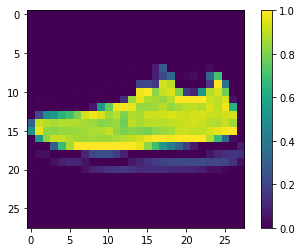

In [66]:
lottonum = 423                 #chang this val to test pc prediction
print(class_names[np.argmax(predictions[lottonum])]) #gets to print class name of obj predicted by model.

#check corresponding image in our test dataset for marking
plt.figure()
plt.imshow(training_imgs[lottonum])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number150
1/1 [==============================] - 0s 43ms/step
prediction [[1.1569629e-02 4.2341178e-04 4.9930517e-02 7.2344577e-01 1.7340089e-01
  1.2859084e-08 4.1026879e-02 2.0378640e-10 2.0280173e-04 4.1262240e-08]]
pred classs Dress


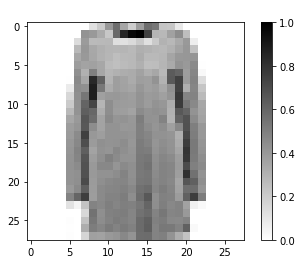

In [67]:
COLOR = 'white'
plt.rcParams['text.color']= COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def show_image(myimg, label, guess):
    plt.figure()
    plt.imshow(myimg, cmap=plt.cm.binary)
    plt.title('Expected: ' + label)
    plt.xlabel("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()
    
def predict(model, img, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankleboot']
    prediction = model.predict(np.array([img]))
    print('prediction',prediction)
    predicted_class = class_names[np.argmax(prediction)]
    print('pred classs', predicted_class)
    
    show_image(img, class_names[correct_label], predicted_class)
    

def getnum():
    while True:
        num = input('Pick a number')
        if num.isdigit():
            num = int(num)
            if 0<=num<=10000:
                return int(num)
        else:
            print('Try again...')

num = getnum()
img = testing_imgs[num]
lbl = testing_lbls[num]
predict(ourmodel, img, lbl)

Pick a number5000
1/1 [==============================] - 0s 42ms/step
prediction [[7.2596688e-04 7.8246947e-09 9.7371012e-01 5.0356681e-07 1.7765203e-02
  7.9136576e-08 7.7971499e-03 4.0753775e-10 1.0717677e-06 2.9552372e-10]]
pred classs Pullover
Pullover Pullover


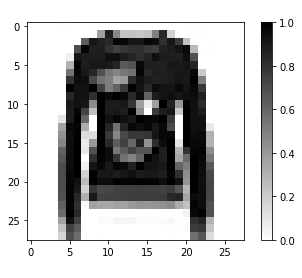

In [70]:
COLOR = 'white'
plt.rcParams['text.color']= COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def show_image(myimg, label, guess):
    plt.figure()
    plt.imshow(myimg, cmap=plt.cm.binary)
    plt.title('Expected: ' + label)
    print(label, guess)
    plt.xlabel("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()
    
def predict(model, img, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankleboot']
    prediction = model.predict(np.array([img]))
    print('prediction',prediction)
    predicted_class = class_names[np.argmax(prediction)]
    print('pred classs', predicted_class)
    
    show_image(img, class_names[correct_label], predicted_class)
    

def getnum():
    while True:
        num = input('Pick a number')
        if num.isdigit():
            num = int(num)
            if 0<=num<=10000:
                return int(num)
        else:
            print('Try again...')

num = getnum()
img = testing_imgs[num]
lbl = testing_lbls[num]
predict(ourmodel, img, lbl)

### the above illustration is wrong...It was supposed to return a sandal img but returned a shoe image. 
This begs the question:
# How do you improve the accuracy of your model?